<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/Final%20Asgn_Q3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torch.optim.lr_scheduler as lr_scheduler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
import random
import time
import matplotlib.pyplot as plt
np.random.seed(0)

%matplotlib inline

In [200]:
image_classification_data = pd.read_csv('/content/drive/MyDrive/Q3_data.csv', index_col = False)
image_classification_data.head()

,label,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature744,feature745,feature746,feature747,feature748,feature749,feature750,feature751,feature752,feature753,feature754,feature755,feature756,feature757,feature758,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768,feature769,feature770,feature771,feature772,feature773,feature774,feature775,feature776,feature777,feature778,feature779,feature780,feature781,feature782,feature783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
image_classification_data

,label,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature744,feature745,feature746,feature747,feature748,feature749,feature750,feature751,feature752,feature753,feature754,feature755,feature756,feature757,feature758,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768,feature769,feature770,feature771,feature772,feature773,feature774,feature775,feature776,feature777,feature778,feature779,feature780,feature781,feature782,feature783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23997,2,0,0,0,0,0,0,0,0,0,0,0,0,147,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23998,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,255,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [202]:
X_data = image_classification_data[image_classification_data.columns[1:]]
X_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature744,feature745,feature746,feature747,feature748,feature749,feature750,feature751,feature752,feature753,feature754,feature755,feature756,feature757,feature758,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768,feature769,feature770,feature771,feature772,feature773,feature774,feature775,feature776,feature777,feature778,feature779,feature780,feature781,feature782,feature783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23997,0,0,0,0,0,0,0,0,0,0,0,0,147,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,255,255,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [203]:
X_array = X_data.to_numpy()
X_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [204]:
X_array = np.round(X_array / 255, 3)
X_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [205]:
response_cols = [0]
y = image_classification_data[image_classification_data.columns[response_cols]].to_numpy()
y

array([[1],
       [2],
       [3],
       ...,
       [2],
       [3],
       [4]])

In [206]:
y = y - 1
y

array([[0],
       [1],
       [2],
       ...,
       [1],
       [2],
       [3]])

In [207]:
#How many labels does the data have? 
#print the unique classes
print('unique classes: ',np.unique(y))
n = X_array.shape[0] #Number of data points or samples 
print('number of samples:', n)
d = X_array.shape[1] #Dimension of data points
print('number of features:', d)

unique classes:  [0 1 2 3]
number of samples: 24000
number of features: 784


a) [C] Shuffle and split the data given in Q3 data.xlsx file and construct a train partition with 80% of the data and test partition with 20% of the data.

In [208]:
train_X, test_X, train_y, test_y = train_test_split(X_array, y, test_size=0.2, shuffle = True, random_state=0)

In [209]:
print('num train X:', len(train_X), 'num train_y:', len(train_y))
print('num test X:', len(test_X), 'num test_y:', len(test_y))

num train X: 19200 num train_y: 19200
num test X: 4800 num test_y: 4800


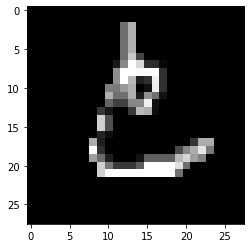



Label in dataset: [2]


In [210]:
i=1000
train_X_img = train_X[i].reshape(28, 28)
train_X_img
plt.imshow(train_X_img,cmap='gray')
plt.show()
print(f"\n\nLabel in dataset: {train_y[i]+1}")

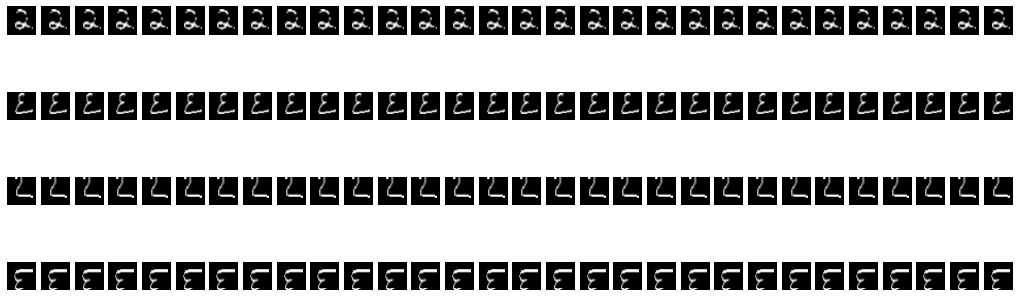

In [212]:
# Sample images for all digits

digits = np.unique(train_y)
M = 30
dim = 28
N = 500
fig, axs = plt.subplots(len(digits), M, figsize=(18,6))

for i,d in enumerate(digits):
  start = 0
  for j in range(M):
    for n in range(start, N):
      if train_y[n] == d:
        axs[i,j].imshow(train_X[n].reshape((dim,dim)), cmap='gray')
        axs[i,j].axis('off')
        start = n
      n += 1

In [213]:
# convert numpy arrays to pytorch tensors
train_X_t = torch.stack([torch.from_numpy(np.array(i)) for i in train_X])
train_y_t = torch.stack([torch.from_numpy(np.array(i)) for i in train_y])

test_X_t = torch.stack([torch.from_numpy(np.array(i)) for i in test_X])
test_y_t = torch.stack([torch.from_numpy(np.array(i)) for i in test_y])

# reshape into [C, H, W]
train_X_t = train_X_t.reshape((-1, 1, 28, 28)).float()
test_X_t = test_X_t.reshape((-1, 1, 28, 28)).float()

# create dataset
train_data = torch.utils.data.TensorDataset(train_X_t, train_y_t)
test_data = torch.utils.data.TensorDataset(test_X_t, test_y_t)

In [214]:
print(f'Train: {len(train_data)}')
print(f'Test: {len(test_data)}')

Train: 19200
Test: 4800


In [215]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0040, 0.2160, 0.9920, 0.9760, 0.9760, 0.5690,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0080, 0.1920, 0.9250, 0.6940, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0040, 0.1960, 0.8590, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [216]:
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

In [217]:
# prepare data loaders
train_loader_multi = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader_multi = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [218]:
## Define the NN architecture
import torch.nn as nn

class MLP_multi(nn.Module):
    def __init__(self):
        super(MLP_multi, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden_2 -> hidden_3)
        self.fc3 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 1)
        self.fc4 = nn.Linear(512, 4)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# initialize the MLP
model_multi = MLP_multi()
print(model_multi)

MLP_multi(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=4, bias=True)
)


In [219]:
## Specify loss and optimization functions

# specify loss function
criterion_multi = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model_multi.parameters(), lr=0.001)

In [220]:
# number of epochs to train the model
n_epochs = 200

model_multi.train() # prep model for training
errors = np.zeros(n_epochs)
count = 0
train_output = []
train_target = []
for epoch in range(n_epochs):
    train_loss = 0.0
    count +=1
    # train the model
    for data, target in train_loader_multi:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_multi(data)
        # calculate the loss
        loss_multi = criterion_multi(output, target.squeeze())
        # backward pass: compute gradient of the loss with respect to model parameters
        loss_multi.backward()
        # perform the optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss_multi.item()*data.size(0)
        if count == n_epochs:
          for i in range(batch_size):
            train_output.append(output[i])
            train_target.append(target.data[i])
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader_multi.dataset)
    errors[epoch] = train_loss
    if (epoch+1)%10 == 0:
      print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 10 	Training Loss: 0.449218
Epoch: 20 	Training Loss: 0.178894
Epoch: 30 	Training Loss: 0.137806
Epoch: 40 	Training Loss: 0.117331
Epoch: 50 	Training Loss: 0.102780
Epoch: 60 	Training Loss: 0.090403
Epoch: 70 	Training Loss: 0.079112
Epoch: 80 	Training Loss: 0.068722
Epoch: 90 	Training Loss: 0.059312
Epoch: 100 	Training Loss: 0.051063
Epoch: 110 	Training Loss: 0.043955
Epoch: 120 	Training Loss: 0.037868
Epoch: 130 	Training Loss: 0.032681
Epoch: 140 	Training Loss: 0.028250
Epoch: 150 	Training Loss: 0.024475
Epoch: 160 	Training Loss: 0.021255
Epoch: 170 	Training Loss: 0.018511
Epoch: 180 	Training Loss: 0.016177
Epoch: 190 	Training Loss: 0.014182
Epoch: 200 	Training Loss: 0.012479


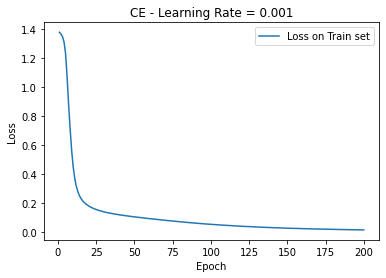

In [221]:
x = np.arange(1, len(errors)+1)
plt.plot(x, errors, label="Loss on Train set")
plt.legend()
plt.title('CE - Learning Rate = 0.001')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [222]:
test_loss = 0.0
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))

model_multi.eval() # prep model for *evaluation*

test_output = []
test_target = []

for data, target in test_loader_multi:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model_multi(data)
    output = output.squeeze()
    # calculate the loss
    loss = criterion_multi(output, target.squeeze())
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        test_output.append(output[i])
        test_target.append(target.data[i])

# calculate and print avg test loss
test_loss = test_loss/len(test_loader_multi.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(4):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % str(i))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.056934

Test Accuracy of     0: 98% (1149/1164)
Test Accuracy of     1: 97% (1206/1237)
Test Accuracy of     2: 97% (1159/1190)
Test Accuracy of     3: 98% (1191/1209)

Test Accuracy (Overall): 98% (4705/4800)


In [223]:
train_output_index = []
for i in range(len(train_output)):
  m = nn.Softmax(dim=0)
  prob = m(train_output[i])
  idx = np.argmax(prob.detach().numpy())
  train_output_index.append(idx)
#train_output_index

test_output_index = []
for i in range(len(test_output)):
  m = nn.Softmax(dim=0)
  prob = m(test_output[i])
  idx = np.argmax(prob.detach().numpy())
  test_output_index.append(idx)
#test_output_index

In [224]:
def c_report(train_y, predicted_train_y, test_y, predicted_test_y):
  train_cr = classification_report(train_y, predicted_train_y)
  print("Train Report:")
  print(train_cr)
  test_cr = classification_report(test_y, predicted_test_y)
  print("Test Report:")
  print(test_cr)

In [225]:
# Calling classification report function
c_report(train_y, train_output_index, test_y, test_output_index)

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4836
           1       1.00      1.00      1.00      4763
           2       1.00      1.00      1.00      4810
           3       1.00      1.00      1.00      4791

    accuracy                           1.00     19200
   macro avg       1.00      1.00      1.00     19200
weighted avg       1.00      1.00      1.00     19200

Test Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1164
           1       0.97      0.97      0.97      1237
           2       0.97      0.97      0.97      1190
           3       0.99      0.99      0.99      1209

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



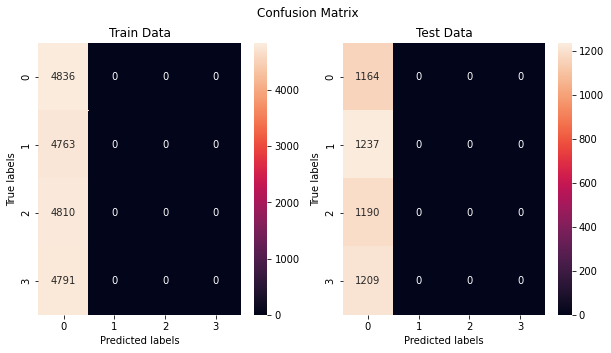

In [226]:
cm_train = confusion_matrix(train_y, train_predicted_labels)
cm_test = confusion_matrix(test_y, test_predicted_labels)

# Calling Confusion Matrix function to plot
conf_matrix(cm_train, cm_test)

CNN Model

In [227]:
# convert numpy arrays to pytorch tensors
train_X_cnn = torch.stack([torch.from_numpy(np.array(i)) for i in train_X])
train_y_cnn = torch.stack([torch.from_numpy(np.array(i)) for i in train_y])

test_X_cnn = torch.stack([torch.from_numpy(np.array(i)) for i in test_X])
test_y_cnn = torch.stack([torch.from_numpy(np.array(i)) for i in test_y])

# reshape into [C, H, W]
train_X_cnn = train_X_cnn.reshape((-1, 1, 28, 28)).float()
test_X_cnn = test_X_cnn.reshape((-1, 1, 28, 28)).float()

# create dataset
train_data = torch.utils.data.TensorDataset(train_X_cnn, train_y_cnn.squeeze())
test_data = torch.utils.data.TensorDataset(test_X_cnn, test_y_cnn.squeeze())

In [228]:
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [229]:
### Model settings###

# Hyperparameters
learning_rate = 0.01

# Architecture
num_classes = 4

In [230]:
class VNBNet(nn.Module):
    def __init__(self, num_classes= 4):
        super(VNBNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(128, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 3 * 3, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 3 * 3)
        x = self.classifier(x)
        logits = x
        probas = F.log_softmax(x, dim=1)  
        return logits, probas

In [231]:
# Initialize the model
model = VNBNet()

In [232]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 11,229,188 trainable parameters


In [233]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [235]:
lossfn = nn.CrossEntropyLoss()

In [236]:
if torch.cuda.is_available():
  print('cuda available! using cuda..')
else:
  print('cuda not available! using cpu..')    

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cuda not available! using cpu..


In [237]:
model = model.to(device)
lossfn = lossfn.to(device)

In [238]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [239]:
# Compute the Accuracy
def compute_accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):            
        features = features.to(device)
        targets = targets.to(device)
        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

In [240]:
# Compute Performance Metrics
def compute_perf_metrics(model, data_loader):
    pred_labels = []
    for i, (features, targets) in enumerate(data_loader):            
        features = features.to(device)
        targets = targets.to(device)
        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        predicted_labels_array = predicted_labels.detach().numpy()
        for i in range(batch_size):
          pred_labels.append(predicted_labels_array[i])
    return pred_labels

In [241]:
def c_report(train_y, predicted_train_y, test_y, predicted_test_y):
  train_cr = classification_report(train_y, predicted_train_y)
  print("Train Report:")
  print(train_cr)
  test_cr = classification_report(test_y, predicted_test_y)
  print("Test Report:")
  print(test_cr)

In [242]:
def conf_matrix(cm_train, cm_test):
  import seaborn as sns
  fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
  ax1, ax2 = axes
  sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
  sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
  ax1.set_title('Train Data')
  ax1.set_xlabel('Predicted labels')
  ax1.set_ylabel('True labels')
  ax1.xaxis.set_ticklabels(['0', '1', '2', '3'])
  ax1.yaxis.set_ticklabels(['0', '1', '2', '3'])

  ax2.set_title('Test Data')
  ax2.set_xlabel('Predicted labels')
  ax2.set_ylabel('True labels')
  ax2.xaxis.set_ticklabels(['0', '1', '2', '3'])
  ax2.yaxis.set_ticklabels(['0', '1', '2', '3'])

  fig.suptitle('Confusion Matrix')

In [243]:
def train(model, iterator, optimizer, criterion, device):
    
    epoch_loss = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        y_pred_logits, y_pred_probas = model(x)
        
        loss = lossfn(y_pred_logits, y)
        
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
    
    return epoch_loss / len(iterator)

In [244]:
save_model = False
patience_early_stopping = 3  #training will stop if model performance does not improve for these many consecutive epochs
cnt = 0 #counter for checking patience level
EPOCHS = 4 #100
prev_test_acc = 0 #initializing prev test accuracy for early stopping condition
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'max', factor = 0.2, patience = 1) #learning rate scheduler, update learning rate by 
#factor of 0.2 if test accuracy does not improve for patience+1 consecutive epochs
for epoch in range(EPOCHS):
    print("current learning rate", optimizer.state_dict()['param_groups'][0]['lr'])
    start_time = time.perf_counter()
    
    train_loss = train(model, train_loader, optimizer, lossfn, device)
    train_acc = compute_accuracy(model, train_loader) 

    if save_model:
        torch.save(model.state_dict(), 'vnbnet_model.pt')
    
    if epoch%1==0: #for every epoch we shall compute the test accuracy
        test_acc = compute_accuracy(model, test_loader)
        
        if test_acc > prev_test_acc: #check if test accuracy for current epoch has improved compared to previous epoch
          cnt = 0                    #f accuracy improves reset counter to 0

        else:                        #otherwise increment current counter
          cnt += 1

        prev_test_acc = test_acc

    
    scheduler.step(test_acc) #updates learning rate
    
        
    end_time = time.perf_counter()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:2} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
    if epoch%1==0: #for every epoch we shall print the test loss and test accuracy 
        print(f'\t test Acc: {test_acc:.2f}% \n')
    
    if epoch == EPOCHS-1:
      train_predicted_labels = compute_perf_metrics(model, train_loader)
      test_predicted_labels = compute_perf_metrics(model, test_loader)

    if cnt == patience_early_stopping:
      print(f"early stopping as test accuracy did not improve for {patience_early_stopping} consecutive epochs")
      break

current learning rate 0.01
Epoch:  1 | Epoch Time: 11m 36s
	Train Loss: 4.504 | Train Acc: 24.95%
	 test Acc: 25.19% 

current learning rate 0.01
Epoch:  2 | Epoch Time: 12m 54s
	Train Loss: 1.387 | Train Acc: 24.95%
	 test Acc: 25.19% 

current learning rate 0.01
Epoch:  3 | Epoch Time: 12m 51s
	Train Loss: 1.387 | Train Acc: 24.95%
	 test Acc: 25.19% 

current learning rate 0.002
Epoch:  4 | Epoch Time: 12m 48s
	Train Loss: 1.387 | Train Acc: 25.19%
	 test Acc: 24.25% 

early stopping as test accuracy did not improve for 3 consecutive epochs


In [245]:
c_report(train_y, train_predicted_labels, test_y, test_predicted_labels)

Train Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40      4836
           1       0.00      0.00      0.00      4763
           2       0.00      0.00      0.00      4810
           3       0.00      0.00      0.00      4791

    accuracy                           0.25     19200
   macro avg       0.06      0.25      0.10     19200
weighted avg       0.06      0.25      0.10     19200

Test Report:
              precision    recall  f1-score   support

           0       0.24      1.00      0.39      1164
           1       0.00      0.00      0.00      1237
           2       0.00      0.00      0.00      1190
           3       0.00      0.00      0.00      1209

    accuracy                           0.24      4800
   macro avg       0.06      0.25      0.10      4800
weighted avg       0.06      0.24      0.09      4800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

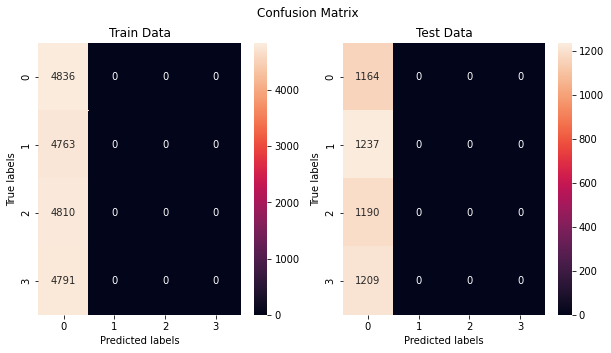

In [246]:
cm_train = confusion_matrix(train_y, train_predicted_labels)
cm_test = confusion_matrix(test_y, test_predicted_labels)

# Calling Confusion Matrix function to plot
conf_matrix(cm_train, cm_test)